In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from sqlalchemy import create_engine
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# import getpass


In [21]:
# password = getpass.getpass()
# !RSYNC_PASSWORD={password} rsync -avPR -e 'ssh -p 23263' mathias@gate08.aime.info:/home/mathias/workspace/pia-ic-web/./results.db ~/Downloads
# del password
!rsync pia@vxpod01.cp.jku.at:/var/home/pia/pia_persistent/results.db ~/Downloads

In [22]:
db = '/home/mathias/Downloads/results.db'
# db = '/home/mathias/devel/python/pia-ic-web/pia-ic-web/results.db'
with create_engine(f'sqlite:///{db}').connect() as conn: 
    result = pd.read_sql_table('result', conn, index_col='id')
    sample_collection = pd.read_sql_table('sample_collection', conn)
    user = pd.read_sql_table('user', conn, index_col='id')


In [67]:
def hehe(x):
    return x['time'], x['correct_exp']+ '/'+'samplingconfig-k-traces-128-temperature-1-0-n-poly-notes-none-dynamic-temperature-max-ic-50-0-top-p-0-0-top-k-0'+'/'+x['correct_piece']+'/'+str(x['correct_sample']) ,x['selected_exp']+ '/'+'samplingconfig-k-traces-128-temperature-1-0-n-poly-notes-none-dynamic-temperature-max-ic-50-0-top-p-0-0-top-k-0'+'/'+x['selected_piece']+'/'+str(x['selected_sample'])
result.tail(5).apply(hehe,axis=1).values


array([('2024-03-27 16:31:59', 'd30e81355ddfe0c3bc1975e719f3457053510c566c1e49e2494bae4dbfddc66a/samplingconfig-k-traces-128-temperature-1-0-n-poly-notes-none-dynamic-temperature-max-ic-50-0-top-p-0-0-top-k-0/kv331_1_start_-45_nodes_134_end_0/6', 'd30e81355ddfe0c3bc1975e719f3457053510c566c1e49e2494bae4dbfddc66a/samplingconfig-k-traces-128-temperature-1-0-n-poly-notes-none-dynamic-temperature-max-ic-50-0-top-p-0-0-top-k-0/kv331_1_start_-45_nodes_134_end_0/6'),
       ('2024-03-27 16:46:29', '8be2450735d84156c7a8b0c22e611ca531bf536ab6f8e71ccc50c8817b9cc67a/samplingconfig-k-traces-128-temperature-1-0-n-poly-notes-none-dynamic-temperature-max-ic-50-0-top-p-0-0-top-k-0/126/1', '8be2450735d84156c7a8b0c22e611ca531bf536ab6f8e71ccc50c8817b9cc67a/samplingconfig-k-traces-128-temperature-1-0-n-poly-notes-none-dynamic-temperature-max-ic-50-0-top-p-0-0-top-k-0/126/1'),
       ('2024-03-27 16:48:38', '8be2450735d84156c7a8b0c22e611ca531bf536ab6f8e71ccc50c8817b9cc67a/samplingconfig-k-traces-128-tempera

In [25]:
result.groupby('exp_type').apply(lambda result: (result.correct_exp == result.selected_exp).mean())

exp_type
0               1.000000
drawn_curves    0.722222
dtype: float64

In [16]:
result[result.exp_type == 'drawn_curves']

,id,time,exp_type,correct_piece,correct_exp,correct_sample,selected_piece,selected_exp,selected_sample,user_id
0,1,2024-03-28 17:13:56,drawn_curves,kv331_1_start_-45_nodes_134_end_0,a6aa5f7b2689124d92900e130182eebe0394953f773fcf...,67,kv331_1_start_-45_nodes_134_end_0,a6aa5f7b2689124d92900e130182eebe0394953f773fcf...,67,1
1,2,2024-03-28 17:15:31,drawn_curves,kv331_1_start_-45_nodes_134_end_0,d30e81355ddfe0c3bc1975e719f3457053510c566c1e49...,90,kv331_1_start_-45_nodes_134_end_0,d30e81355ddfe0c3bc1975e719f3457053510c566c1e49...,90,1
2,3,2024-03-28 17:17:38,drawn_curves,kv331_1_start_-45_nodes_134_end_0,d30e81355ddfe0c3bc1975e719f3457053510c566c1e49...,135,kv331_1_start_-45_nodes_134_end_0,d30e81355ddfe0c3bc1975e719f3457053510c566c1e49...,135,1
3,4,2024-03-28 17:18:21,drawn_curves,kv331_1_start_-45_nodes_134_end_0,d52c4aa9a59ad9edb6c51cc4032185f21d1ea1cec9224e...,25,kv331_1_start_-45_nodes_134_end_0,d52c4aa9a59ad9edb6c51cc4032185f21d1ea1cec9224e...,25,1
4,5,2024-03-28 17:21:42,drawn_curves,kv331_1_start_-45_nodes_134_end_0,72a43dd9af72e7ccd05ba5ecc8e1fd8e535846e8388e73...,109,kv331_1_start_-45_nodes_134_end_0,5866e160e605939fa3643f4d30e00db67e4a8b6a4f1e1b...,67,1
5,6,2024-03-28 17:26:23,drawn_curves,kv332_2_start_149_nodes_177_end_0,72a43dd9af72e7ccd05ba5ecc8e1fd8e535846e8388e73...,105,kv332_2_start_149_nodes_177_end_0,5866e160e605939fa3643f4d30e00db67e4a8b6a4f1e1b...,43,1
7,8,2024-03-28 17:32:17,drawn_curves,kv332_2_start_149_nodes_177_end_0,72a43dd9af72e7ccd05ba5ecc8e1fd8e535846e8388e73...,126,kv332_2_start_149_nodes_177_end_0,72a43dd9af72e7ccd05ba5ecc8e1fd8e535846e8388e73...,126,1
8,9,2024-03-28 17:33:20,drawn_curves,kv331_1_start_-45_nodes_134_end_0,72a43dd9af72e7ccd05ba5ecc8e1fd8e535846e8388e73...,4,kv331_1_start_-45_nodes_134_end_0,72a43dd9af72e7ccd05ba5ecc8e1fd8e535846e8388e73...,4,1
9,10,2024-03-28 17:34:47,drawn_curves,kv332_2_start_149_nodes_177_end_0,a6aa5f7b2689124d92900e130182eebe0394953f773fcf...,43,kv332_2_start_149_nodes_177_end_0,5866e160e605939fa3643f4d30e00db67e4a8b6a4f1e1b...,56,1
10,11,2024-03-28 17:37:39,drawn_curves,kv332_2_start_149_nodes_177_end_0,5866e160e605939fa3643f4d30e00db67e4a8b6a4f1e1b...,107,kv332_2_start_149_nodes_177_end_0,5866e160e605939fa3643f4d30e00db67e4a8b6a4f1e1b...,107,1


In [21]:
4/6, 1/5

(0.6666666666666666, 0.2)

In [20]:
result.correct_exp.unique()

array(['a6aa5f7b2689124d92900e130182eebe0394953f773fcfec9b9e9e1466e792da',
       'd30e81355ddfe0c3bc1975e719f3457053510c566c1e49e2494bae4dbfddc66a',
       'd52c4aa9a59ad9edb6c51cc4032185f21d1ea1cec9224e7ee636a971ec8432aa',
       '72a43dd9af72e7ccd05ba5ecc8e1fd8e535846e8388e735e0c5e349e7540c30b',
       '8be2450735d84156c7a8b0c22e611ca531bf536ab6f8e71ccc50c8817b9cc67a',
       '5866e160e605939fa3643f4d30e00db67e4a8b6a4f1e1b22434182868a7052ca'],
      dtype=object)

In [7]:
list(exp_mapper.keys())

['a6aa5f7b2689124d92900e130182eebe0394953f773fcfec9b9e9e1466e792da',
 '72a43dd9af72e7ccd05ba5ecc8e1fd8e535846e8388e735e0c5e349e7540c30b',
 'd30e81355ddfe0c3bc1975e719f3457053510c566c1e49e2494bae4dbfddc66a',
 'd52c4aa9a59ad9edb6c51cc4032185f21d1ea1cec9224e7ee636a971ec8432aa',
 '5866e160e605939fa3643f4d30e00db67e4a8b6a4f1e1b22434182868a7052ca']

In [8]:
result.correct_exp.apply(lambda x: exp_mapper[x])

KeyError: '8be2450735d84156c7a8b0c22e611ca531bf536ab6f8e71ccc50c8817b9cc67a'

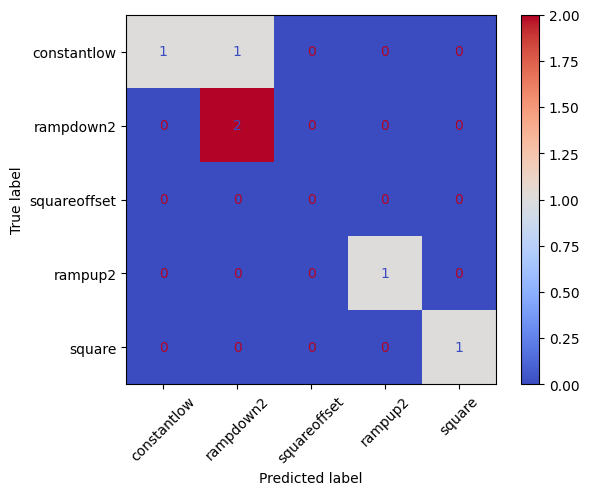

In [26]:
# ['constantlow', 5.0, 5.0],
# ['rampdown2', null, null],
# ['squareoffset', null, null],
# ['rampup2', null, null],
# ['square', null, null],
exp_mapper = {'a6aa5f7b2689124d92900e130182eebe0394953f773fcfec9b9e9e1466e792da': 'constantlow',
'72a43dd9af72e7ccd05ba5ecc8e1fd8e535846e8388e735e0c5e349e7540c30b': 'rampdown2',
'd30e81355ddfe0c3bc1975e719f3457053510c566c1e49e2494bae4dbfddc66a': 'squareoffset',
'd52c4aa9a59ad9edb6c51cc4032185f21d1ea1cec9224e7ee636a971ec8432aa': 'rampup2',
'5866e160e605939fa3643f4d30e00db67e4a8b6a4f1e1b22434182868a7052ca': 'square'}
# labels = result.exp.apply(lambda x: exp_mapper[x.exp])
labels = list(exp_mapper.values())
result_gen = result[result.correct_exp != '8be2450735d84156c7a8b0c22e611ca531bf536ab6f8e71ccc50c8817b9cc67a'] 
result_gen = result_gen[result_gen.user_id == 4]

# normalize='true' -> recall in diag
# normalize='pred' -> precision in diag
cm = confusion_matrix(y_true=result_gen.correct_exp.apply(lambda x: exp_mapper[x]), y_pred=result_gen.selected_exp.apply(lambda x: exp_mapper[x]), labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap='coolwarm')
# disp.plot()
plt.xticks(rotation=45)
plt.show()